In [1]:
from util import (
    download_relationship_metrics_csv,
    read_relationship_metrics_csv,
    get_world_data,
    get_agent_data,
    generate_plot_title,
    download_all_maps
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

simulation_id = "test-700689"
personality = "Neutral Personality"
redownload = False

data_dir = os.path.abspath(os.path.join("..", "data", simulation_id))

download_relationship_metrics_csv(simulation_id=simulation_id, redownload=redownload)
download_all_maps(simulation_id=simulation_id, redownload=redownload)
df = read_relationship_metrics_csv(simulation_id=simulation_id)

df.head()

CSV already exists at ../data/test-700689/test-700689-graph-metrics.csv. Skipping download.
Zip file already exists at ../data/test-700689/maps/simulation_test-700689_maps.zip. Skipping download.


,tick,average_sentiment,average_normalized_sentiment,density,clustering_coefficient,num_nodes,num_edges,num_components,largest_component_size,average_degree_centrality,num_communities,modularity
0,1,0.000000,0.000000,0.000000,0.0,12,0,12,1,0.000000,12,0.000000
1,2,0.428181,0.605345,0.030303,0.0,12,2,10,2,0.030303,10,0.499709
2,3,0.242044,0.560214,0.030303,0.0,12,2,10,2,0.030303,10,0.499977
3,4,0.207375,0.551654,0.030303,0.0,12,2,10,2,0.030303,10,0.499962
4,5,0.303876,0.575238,0.045455,0.0,12,3,9,2,0.045455,9,0.666134


In [3]:
df_filtered = pd.concat([
    df.iloc[[0]],
    df.iloc[1:][df.iloc[1:]['average_sentiment'] != 0]
]).copy()
df_filtered['tick'] = range(1, len(df_filtered) + 1)
df_filtered = df_filtered.sort_values('tick').reset_index(drop=True)
df_filtered.head()

,tick,average_sentiment,average_normalized_sentiment,density,clustering_coefficient,num_nodes,num_edges,num_components,largest_component_size,average_degree_centrality,num_communities,modularity
0,1,0.000000,0.000000,0.000000,0.0,12,0,12,1,0.000000,12,0.000000
1,2,0.428181,0.605345,0.030303,0.0,12,2,10,2,0.030303,10,0.499709
2,3,0.242044,0.560214,0.030303,0.0,12,2,10,2,0.030303,10,0.499977
3,4,0.207375,0.551654,0.030303,0.0,12,2,10,2,0.030303,10,0.499962
4,5,0.303876,0.575238,0.045455,0.0,12,3,9,2,0.045455,9,0.666134


In [4]:
world_data = get_world_data(simulation_id)
agent_data = get_agent_data(simulation_id)

In [5]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

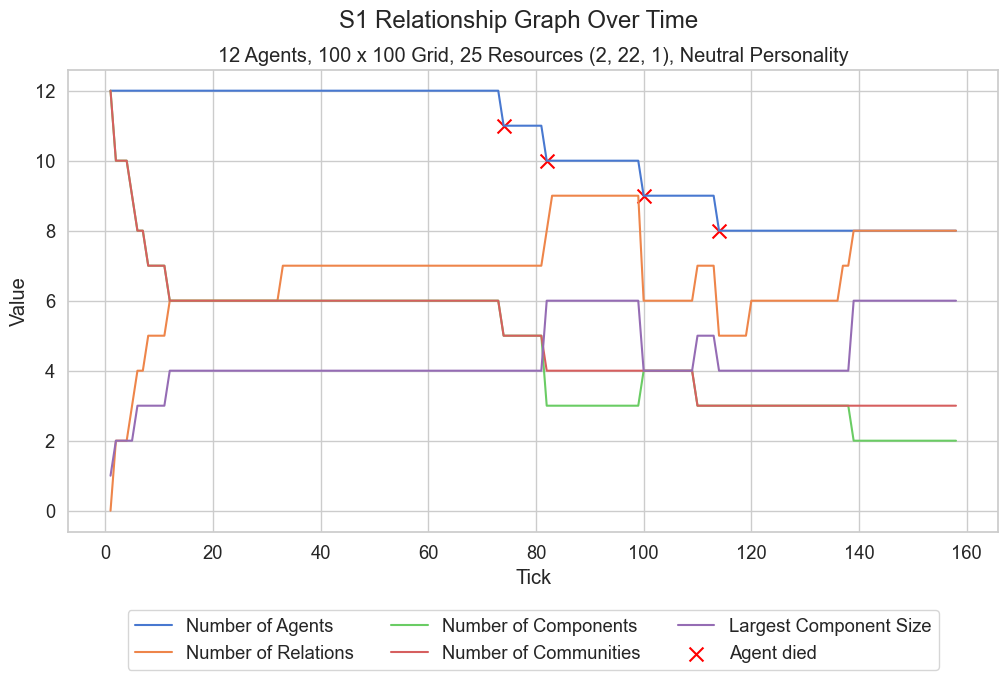

In [8]:
selected_metrics = [
    ("num_nodes", "Number of Agents"),
    ("num_edges", "Number of Relations"),
    ("num_components", "Number of Components"),
    ("num_communities", "Number of Communities"),
    ("largest_component_size", "Largest Component Size"),
]

plt.figure(figsize=(12, 6))
for (metric, label) in selected_metrics:
    sns.lineplot(data=df_filtered, x="tick", y=metric, label=label)

# Find ticks where 'num_nodes' changes, except at the first tick
num_nodes = df_filtered['num_nodes']
change_indices = num_nodes[num_nodes.diff() != 0].index
change_indices = change_indices[change_indices != 0]  # exclude the first tick (index 0)
change_ticks = df_filtered.loc[change_indices, 'tick']
change_values = df_filtered.loc[change_indices, 'num_nodes']

# Mark changes with red 'x'
plt.scatter(change_ticks, change_values, color='red', marker='x', s=100, label='Agent died')

plt.xlabel("Tick")
plt.ylabel("Value")
plt.title(generate_plot_title(world_data, len(agent_data), personality))
plt.suptitle("S1 Relationship Graph Over Time")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.savefig(
    os.path.join(data_dir, f"{simulation_id}_number_of_x.png"),
    dpi=300,
    bbox_inches="tight",
)


plt.show()

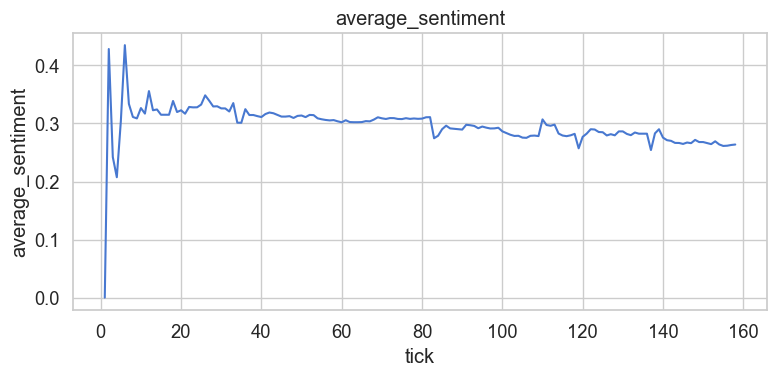

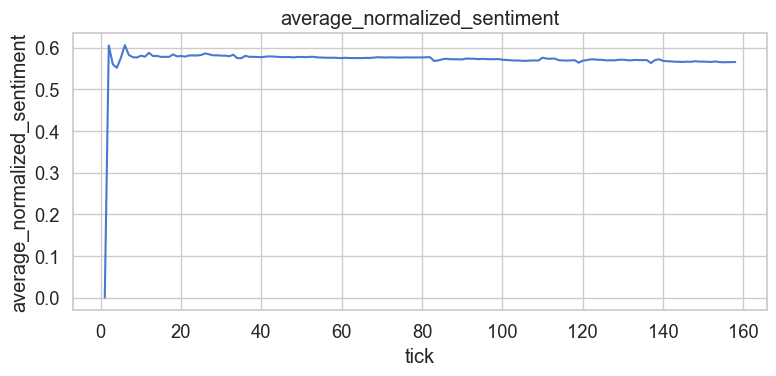

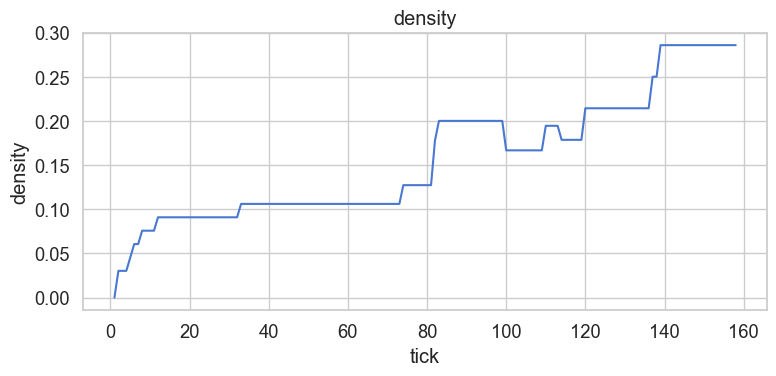

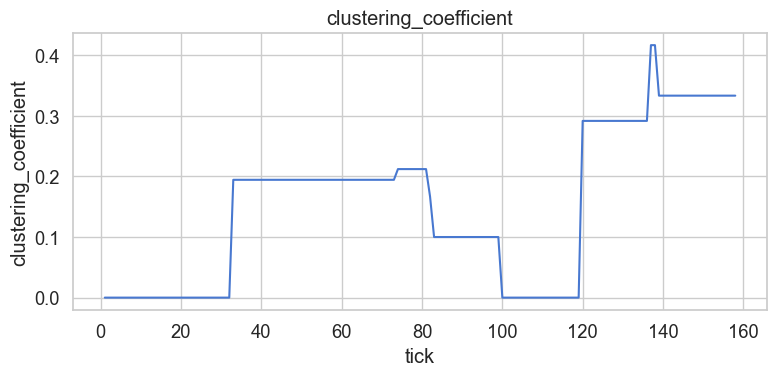

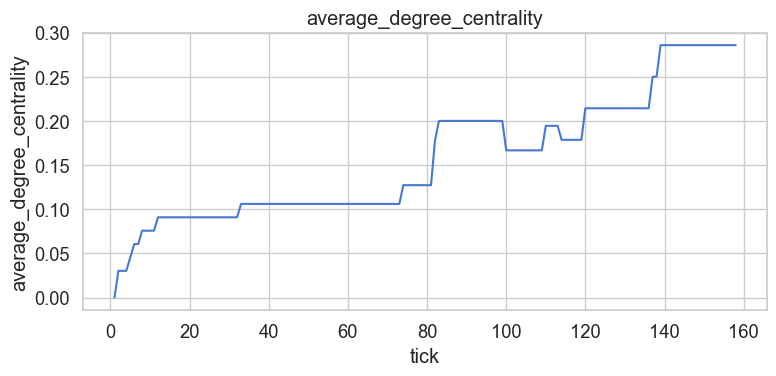

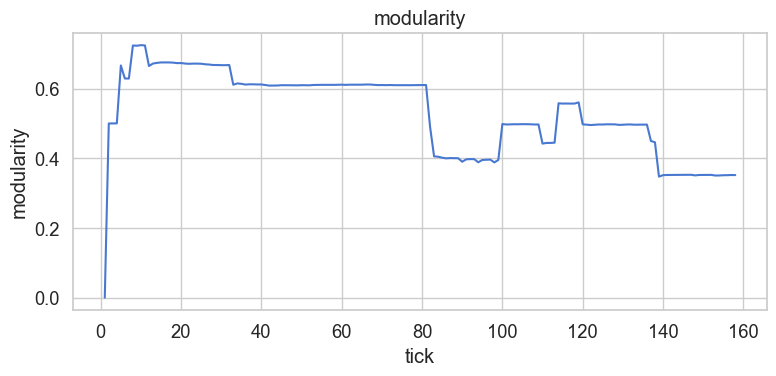

In [7]:
import seaborn as sns

metrics = [col for col in df_filtered.columns if col != "tick"]
selected_metric_names = [m[0] for m in selected_metrics]
other_metrics = [m for m in metrics if m not in selected_metric_names]
for metric in other_metrics:
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df_filtered, x="tick", y=metric)
    plt.title(metric)
    plt.xlabel("tick")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.savefig(os.path.join(data_dir, f"{simulation_id}_{metric}.png"), dpi=300)
    
    plt.show()
